# extra_3.3.6.2_variants_of_MLPRegressor.ipynb

In [2]:
## prepare environment and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

datapath = '../3_data'
from os import chdir; chdir(datapath)

from bfh_cas_pml import prep_data, prep_demo_data
X_train, X_test, y_train, y_test = prep_data('melb_data_prep.csv', 'Price', seed = 1234)

from bfh_cas_pml import test_regression_model

C:\Users\werne\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


R2 = 0.0258


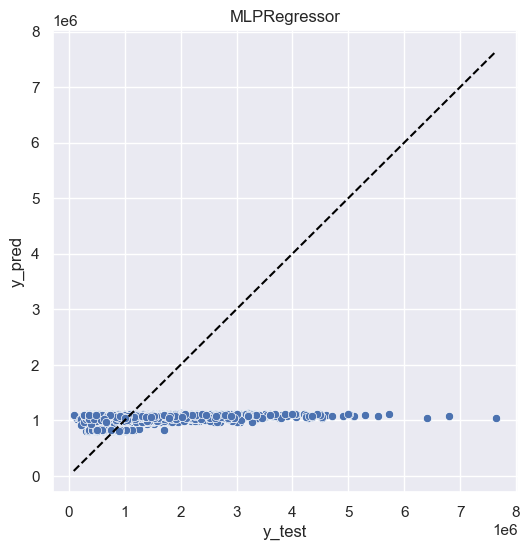

In [3]:
## baseline
from sklearn.neural_network import MLPRegressor
this_model = test_regression_model(
    MLPRegressor(random_state=1234),
    X_train, y_train, X_test, y_test)

C:\Users\werne\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


R2 = -2.4330


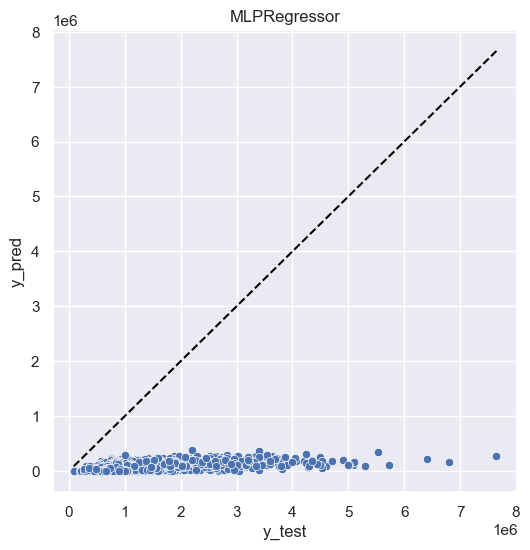

In [4]:
## scaled features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

from sklearn.neural_network import MLPRegressor
this_model = test_regression_model(
    MLPRegressor(random_state=1234),
    X_train_sc, y_train, X_test_sc, y_test)

R2 = 0.7205


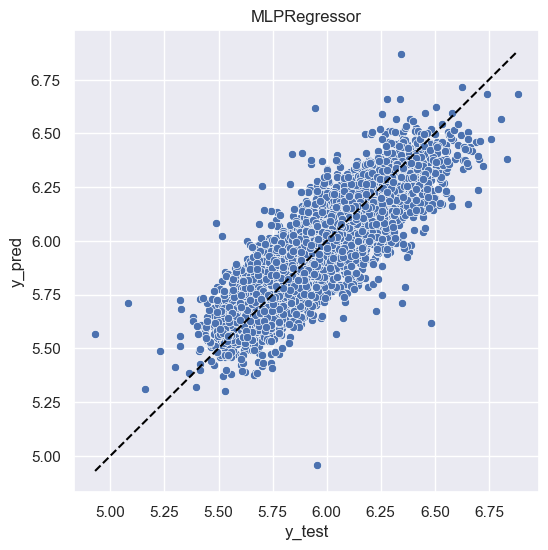

In [5]:
## scaled features and log target
y_train_log = np.log10(y_train)
y_test_log = np.log10(y_test)

from sklearn.neural_network import MLPRegressor
this_model = test_regression_model(
    MLPRegressor(random_state=1234),
    X_train_sc, y_train_log, X_test_sc, y_test_log)

In [6]:
## after retransform of target
model = MLPRegressor(random_state=1234)
model.fit(X_train_sc, y_train_log)
y_pred = model.predict(X_test_sc)

from sklearn.metrics import r2_score
print(r2_score(y_test_log, y_pred))
print(r2_score(y_test, 10**y_pred))

0.7205379997253979
0.6533498659117046
